In [27]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [28]:
CATEGORIES = ['0. apu_nahasapeemapetilon', '1. barney_gumble','2. bart_simpson','3. charles_montgomery_burns','4. homer_simpson','5. lisa_simpson','6. marge_simpson','7. maggie_simpson','8. ned_flanders','9. krusty_the_clown']

In [31]:
import cv2
import numpy as np
import keras
from keras_applications.imagenet_utils import _obtain_input_shape
from keras_squeezenet import SqueezeNet
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.layers import Activation, Dropout, Convolution2D, GlobalAveragePooling2D
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import backend
import os

IMG_SAVE_PATH = 'F:/Data/simpsons/simpsons'

CLASS_MAP = {
    "0. apu_nahasapeemapetilon": 0,
    "1. barney_gumble": 1,
    "2. bart_simpson": 2,
    "3. charles_montgomery_burns": 3,
    "4. homer_simpson": 4,
    "5. lisa_simpson": 5,
    "6. marge_simpson": 6 ,
    "7. maggie_simpson": 7,
    "8. ned_flanders": 8,
    "9. krusty_the_clown": 9
}

NUM_CLASSES = len(CLASS_MAP)


def mapper(val):
    return CLASS_MAP[val]

# load images from the directory
dataset1 = []
for directory in os.listdir(IMG_SAVE_PATH):
    path = os.path.join(IMG_SAVE_PATH, directory)
    if not os.path.isdir(path):
        continue
    for item in os.listdir(path):
        # to make sure no hidden files get in our way
        if item.startswith("."):
            continue
        img = cv2.imread(os.path.join(path, item))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        dataset1.append([img, directory])

data, labels = zip(*dataset1)
labels = list(map(mapper, labels))


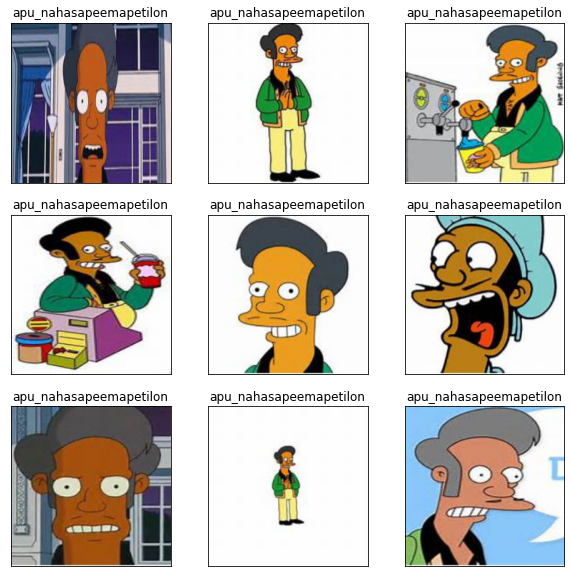

In [32]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(dataset1[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[labels[i]][3:])
plt.show()

In [33]:
import os

def count_files(in_directory):
    joiner= (in_directory + os.path.sep).__add__
    return sum(
        os.path.isfile(filename)
        for filename
        in map(joiner, os.listdir(in_directory))
    )


In [34]:
skew_check=[]
for folder in CATEGORIES:
    skew_check.append(count_files("F:/Data/simpsons/data_test/"+folder))

In [35]:
skew_check #It can be observed that last class has images which in less than 3% of total images

[108, 106, 106, 96, 120, 124, 115, 128, 104, 31]

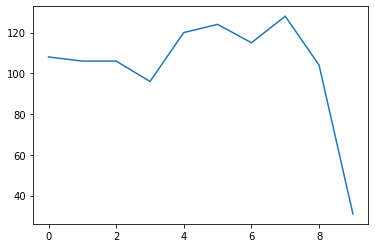

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.plot(skew_check)

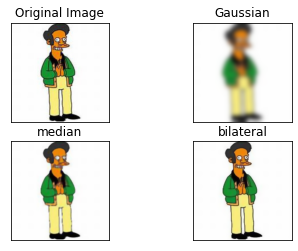

In [38]:
#Testing different types of blur 
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('F:/Data/simpsons/simpsons/0. apu_nahasapeemapetilon/pic_0002.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Gaussian = cv2.GaussianBlur(img, (37, 37), 0) 
median = cv2.medianBlur(img, 5) 
bilateral = cv2.bilateralFilter(img, 9, 75, 75) 
titles = ['Original Image','Gaussian','median','bilateral']
images = [img, Gaussian ,median ,bilateral]

for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [14]:
import matplotlib.pyplot as plt
from skimage import io
import cv2 
import numpy as np
from skimage.morphology import disk
import shutil
import glob
import random
import os,glob
from os import listdir,makedirs
from os.path import isfile,join

In [56]:
#Total number of images
skew_check
sum=0
for i in skew_check:
    sum=sum+i
print(sum)

1038


In [48]:
# Taking only 30% of the images from each class
skew_check
blur_percentage=[]
for i in skew_check:
    per = round((30/100) *i)
    blur_percentage.append(per)

In [49]:
blur_percentage

[32, 32, 32, 29, 36, 37, 34, 38, 31, 9]

### Generating 30% blur images from each category

In [55]:
folderList = ['0. apu_nahasapeemapetilon', '1. barney_gumble','2. bart_simpson','3. charles_montgomery_burns',
              '4. homer_simpson','5. lisa_simpson','6. marge_simpson','7. maggie_simpson','8. ned_flanders',
              '9. krusty_the_clown']

i=0
for folder in folderList:
    #Randomly taking 30% of images from each class
    to_be_moved = random.sample(glob.glob("F:/Data/simpsons/simpsons1/"+folder+"/*.jpg"),blur_percentage[i])
    i = i + 1

    for f in enumerate(to_be_moved, 1):
        dest = os.path.join("F:/Data/simpsons/simpsons1/"+folder)
        os.rename(f[1],f[1][:-4]+"_blur.jpg") #Adding randomly selected images as blur

        if not os.path.exists(dest):
            os.makedirs(dest)


    path = 'F:/Data/simpsons/simpsons1/'+folder # Source Folder
    dstpath = 'F:/Data/simpsons/simpsons1/'+folder # Destination Folder
    try:
        makedirs(dstpath)
    except:
        print ("Directory already exist, images will be written in same folder")
    files = [f for f in listdir(path) if isfile(join(path,f))] 
    for image in files:
        try:
            img = io.imread(os.path.join(path,image))
            if os.path.join(path,image).endswith('blur.jpg'):
                new_img = cv2.GaussianBlur(img, (37, 37), 0) #Applying blur only to randomly selected images as mentioned above
                dstPath = join(dstpath,image)
                io.imsave(dstPath,new_img)

        except Exception as e: 
            print ("{} is not converted".format(image))

Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
Directory already exist, images will be written in same folder
